In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [9]:
iris = load_iris()

In [17]:
variety = iris.target

In [12]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
sepal = data[['sepal length (cm)', 'sepal width (cm)']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(sepal, variety, random_state=42)

In [19]:
LDA = LinearDiscriminantAnalysis()

In [20]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
result = pd.DataFrame(y_test, LDA.predict(X_test))

In [25]:
accuracy_score(y_test, LDA.predict(X_test))

0.868421052631579

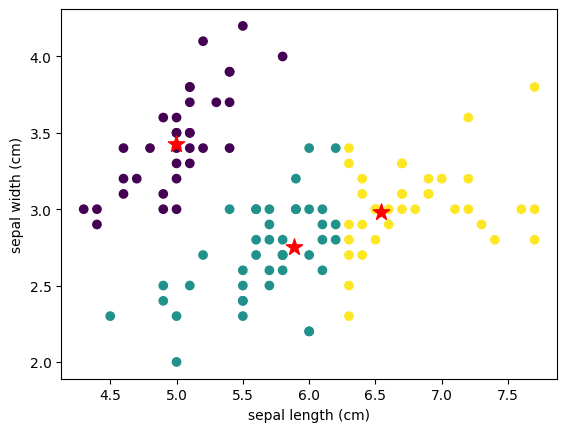

In [37]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=LDA.predict(X_train))
plt.scatter(LDA.means_[:, 0], LDA.means_[:, 1], c='r', s=150, marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

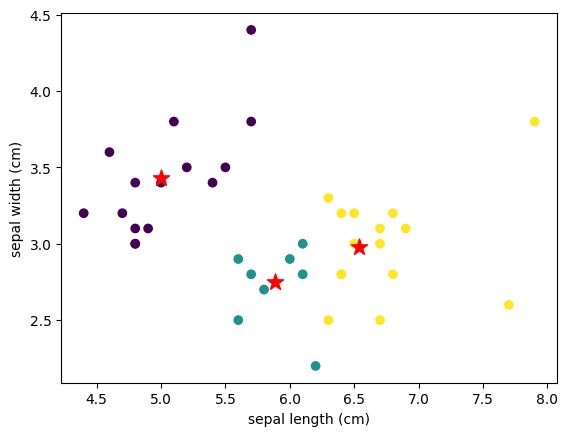

In [38]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=LDA.predict(X_test))
plt.scatter(LDA.means_[:, 0], LDA.means_[:, 1], c='r', s=150, marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [42]:
scaler = StandardScaler()

In [50]:
X_scaled = scaler.fit_transform(sepal)

In [56]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

/Users/xeniakhrustaleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xeniakhrustaleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xeniakhrustaleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/xeniakhrustaleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

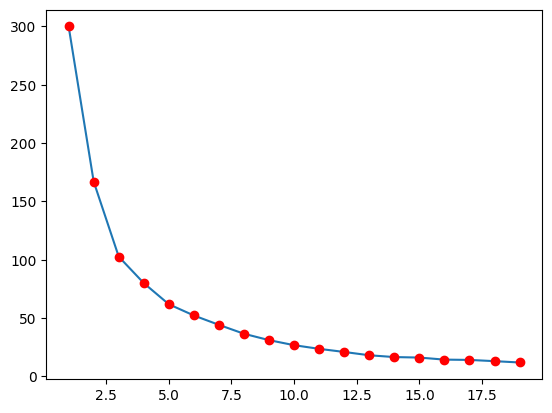

In [57]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')

In [58]:
kmeans = KMeans(n_clusters=3)

In [59]:
cluster = kmeans.fit_predict(X_scaled)

/Users/xeniakhrustaleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
distance_mat = pdist(X_scaled)

In [63]:
z = hierarchy.linkage(distance_mat, 'ward')

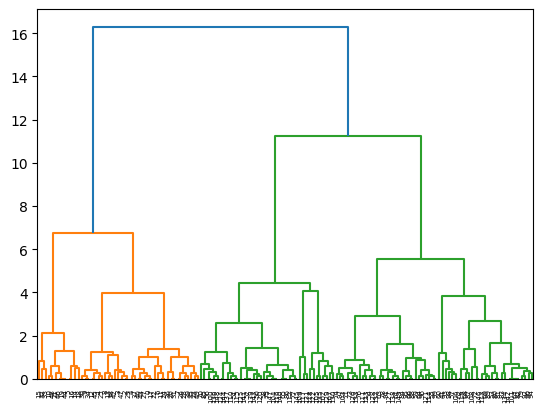

In [64]:
dn = hierarchy.dendrogram(z)